In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [76]:
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')
lookupID = pd.read_csv('IdLookupTable.csv')

In [78]:
train_data.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [79]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [83]:
# missing values
train_data.isna().any().value_counts()

True     28
False     3
dtype: int64

In [86]:
train_data[train_data.isna().any(axis=1)].T

,210,350,499,512,810,839,895,1058,1194,1230,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
left_eye_center_x,65.3651,67.2583,65.783,68.2867,72.3764,71.6087,67.7788,67.4365,65.8911,68.2667,...,69.2299,63.353,65.7112,67.9293,66.8672,67.4025,66.1344,66.6907,70.9651,66.9383
left_eye_center_y,39.9885,37.2299,41.161,38.4908,37.2819,37.3313,38.5372,40.6184,43.8291,51.2135,...,38.5756,35.6713,38.8435,35.8466,37.3569,31.8426,38.3655,36.8452,39.8537,43.4245
right_eye_center_x,28.2515,26.9803,29.971,31.3613,24.5369,23.567,30.1751,29.1972,25.6923,26.464,...,29.4079,33.9521,32.2688,28.6878,30.7509,29.7467,30.4786,31.6664,30.5433,31.0961
right_eye_center_y,37.3997,36.2709,37.97,38.4908,35.0039,38.4754,38.7896,37.1986,42.606,48.6212,...,38.3455,40.8164,37.706,41.4525,40.1157,38.6329,39.9502,39.685,40.7723,39.5286
left_eye_inner_corner_x,59.3229,60.2254,60.4641,61.6045,64.1875,59.7889,59.4505,61.2188,58.4129,59.8414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_inner_corner_y,40.8518,37.5495,41.161,39.1941,37.3149,38.8565,40.5566,41.5513,43.6089,52.1856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_x,71.9821,74.2912,71.4557,74.2647,79.5899,81.1411,76.8638,73.9659,74.3973,75.0716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left_eye_outer_corner_y,41.7152,37.5495,42.2249,38.8425,39.1802,38.4754,39.7993,43.1054,44.6986,52.5099,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
right_eye_inner_corner_x,33.7178,34.3332,35.2899,35.9331,33.2695,34.2431,37.7461,35.415,36.2526,34.2414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
right_eye_inner_corner_y,38.5504,36.5905,39.3886,38.4908,36.1429,39.238,41.0609,39.0643,43.4271,50.5653,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
train_data.fillna(method='ffill', inplace=True)

In [64]:
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [65]:
images_array = np.array(imag, dtype='float')
X_train = images_array.reshape(-1,96,96,1)

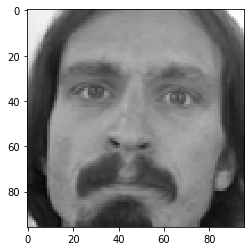

In [66]:
plt.imshow(X_train[0].reshape(96,96), cmap='gray')
plt.show()

In [68]:
train_labels = train_data.drop('Image', axis=1)
train_labels = [train_labels.iloc[i,:] for i in train_labels.index]
train_labels = np.array(train_labels, dtype='float')

In [69]:
train_labels[0]

array([66.03356391, 39.00227368, 30.22700752, 36.4216782 , 59.58207519,
       39.64742256, 73.13034586, 39.96999699, 36.35657143, 37.3894015 ,
       23.45287218, 37.3894015 , 56.95326316, 29.03364812, 80.22712782,
       32.22813835, 40.22760902, 29.0023218 , 16.35637895, 29.64747068,
       44.42057143, 57.06680301, 61.19530827, 79.97016541, 28.61449624,
       77.38899248, 43.3126015 , 72.93545865, 43.13070677, 84.48577444])